# Supervised MACHINE LEARNING MODELS - predict song hotness

Modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import vincent as vin
import seaborn as sb

import time

Machine Learning Modules: 

In [2]:
#import models first:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV #all of the regression models
from sklearn.neighbors import KNeighborsClassifier #knn model
from sklearn.tree import DecisionTreeClassifier #single tree model 
from sklearn.ensemble import RandomForestClassifier #random forest model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier #all of the boosters
from sklearn.svm import SVC #Support Vector Machine Model 

#some additional models if needed:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline #if we want to make a pipeline for several models
from sklearn.feature_extraction.text import TfidfVectorizer #in case we will need it for text processing

#cross validation: 
from sklearn.cross_validation import cross_val_score, train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error
#we need these modules to split the dataset into training set and test set
#and to calculate the cross validation score

#for categorial features
from patsy import dmatrices 
import statsmodels.formula.api as sm

#to select features
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

## data 

Upload data:

In [3]:
data=pd.read_csv('clean_data.csv',sep=',')
len(data)

1760

We need to split the data into at least training and test set - preferably also cross-validation set, but let's see, if it's big enough.

In [4]:
print(data.shape)

(1760, 30)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 30 columns):
Unnamed: 0              1760 non-null int64
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-n

In [6]:
y = np.asarray(data['song_hotness'], dtype="|S6")
#values because it has to be a 1D list

In [7]:
X=data[['play_count_sum','user_id_count','artist_familiarty','artist_hotness','song_durations','song_release_years',\
        'song_keys','song_modes','song_tempo','song_time_signatures','beats_number','bars_number','tatum_number','log_play_count_sum','log_user_id_count']]

In [8]:
X.head()

,play_count_sum,user_id_count,artist_familiarty,artist_hotness,song_durations,song_release_years,song_keys,song_modes,song_tempo,song_time_signatures,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
0,957,554,0.806359,0.545789,415.81669,1991,0,1,131.272,4,15715,2532,109,6.863803,6.317165
1,10,6,0.623502,0.422380,216.05832,1998,2,1,149.169,4,5912,1474,72,2.302585,1.791759
2,1980,748,0.796337,0.582922,256.52200,2009,10,0,107.845,4,5036,1250,15612,7.590852,6.617403
3,1,1,0.583443,0.385788,180.53179,2009,8,1,151.498,4,5005,1240,15508,0.000000,0.000000
4,230,80,0.712745,0.470700,232.25424,1998,0,1,97.995,4,4092,1014,8191,5.438079,4.382027


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 15 columns):
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
song_durations          1760 non-null float64
song_release_years      1760 non-null float64
song_keys               1760 non-null int64
song_modes              1760 non-null int64
song_tempo              1760 non-null float64
song_time_signatures    1760 non-null int64
beats_number            1760 non-null int64
bars_number             1760 non-null int64
tatum_number            1760 non-null int64
log_play_count_sum      1760 non-null float64
log_user_id_count       1760 non-null float64
dtypes: float64(7), int64(8)
memory usage: 220.0 KB


For now we will ignore genre.

### Data split - train vs. test

For cross validation purposes, we will create a train set from 70% of the dataset and a test set form 30%. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size=.7,random_state=42)

In [11]:
for col in data.columns:
    print "%s has %s unique categories" % (col, data[col].nunique())

Unnamed: 0 has 1760 unique categories
song_id has 1760 unique categories
play_count_sum has 556 unique categories
user_id_count has 399 unique categories
track_id has 1760 unique categories
genre_id has 20 unique categories
artist_familiarty has 1078 unique categories
artist_hotness has 1065 unique categories
artist_id has 1058 unique categories
artist_latitude has 262 unique categories
artist_location has 469 unique categories
artist_longitude has 262 unique categories
artist_names has 1058 unique categories
song_durations has 1626 unique categories
song_hotness has 862 unique categories
song_release_years has 50 unique categories
song_titles has 1747 unique categories
song_bars has 1757 unique categories
song_beats has 1757 unique categories
song_keys has 12 unique categories
song_modes has 2 unique categories
song_tatum has 1757 unique categories
song_tempo has 1735 unique categories
song_time_signatures has 6 unique categories
count has 1 unique categories
beats_number has 1405 uni

### Feature selection

#### Recursive Feature Elimination

"The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute."
http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [12]:
log_reg_model = LogisticRegression()

In [13]:
rfe = RFE(log_reg_model, 5)

In [14]:
rfe = rfe.fit(X_train, y_train)

In [15]:
print(rfe.support_)

[False False  True  True False False False  True False  True False False
 False  True False]


In [16]:
print(rfe.ranking_)

[ 5  3  1  1  8  9  2  1  7  1 10 11  6  1  4]


In [56]:
rfe_support=pd.DataFrame(rfe.support_, index = X_train.columns.values, columns =['support'])
rfe_support

,support
play_count_sum,False
user_id_count,False
artist_familiarty,True
artist_hotness,True
song_durations,False
song_release_years,False
song_keys,False
song_modes,True
song_tempo,False
song_time_signatures,True


Interesting, so it seems that the relevant features are artist_familiarty, artist_hotness, song_modes, song_time_signatures and log_play_count_sum.

In [57]:
rfe_ranking=pd.DataFrame(rfe.ranking_, index = X_train.columns.values, columns =['ranking']).sort('ranking',ascending=[True])
rfe_ranking

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ranking
artist_familiarty,1
artist_hotness,1
song_modes,1
song_time_signatures,1
log_play_count_sum,1
song_keys,2
user_id_count,3
log_user_id_count,4
play_count_sum,5
tatum_number,6


#### Feature Importance

In [58]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
etc_df = pd.DataFrame(etc_model.feature_importances_, index = X_train.columns.values, columns =['importance']).sort('importance',ascending=[False])
etc_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,importance
artist_familiarty,0.083209
artist_hotness,0.082917
song_durations,0.076609
song_tempo,0.075827
bars_number,0.074401
beats_number,0.073183
song_release_years,0.071472
log_user_id_count,0.071198
log_play_count_sum,0.068978
play_count_sum,0.066361


In [59]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_df = pd.DataFrame(rfc_model.feature_importances_, index = X_train.columns.values, columns =['importance']).sort('importance',ascending=[False])
rfc_df

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,importance
artist_familiarty,0.092987
artist_hotness,0.086593
song_durations,0.086009
bars_number,0.082435
song_tempo,0.075704
beats_number,0.075692
play_count_sum,0.071062
log_play_count_sum,0.067261
song_release_years,0.066449
user_id_count,0.064655


In [60]:
rfe2 = RFE(rfc_model, 5)
rfe2 = rfe2.fit(X_train, y_train)

In [61]:
rfe2_support=pd.DataFrame(rfe2.support_, index = X_train.columns.values, columns =['support'])
rfe2_support

,support
play_count_sum,False
user_id_count,False
artist_familiarty,True
artist_hotness,True
song_durations,False
song_release_years,False
song_keys,False
song_modes,False
song_tempo,True
song_time_signatures,False


In [62]:
rfe2_ranking=pd.DataFrame(rfe2.ranking_, index = X_train.columns.values, columns =['ranking']).sort('ranking',ascending=[True])
rfe2_ranking

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ranking
artist_familiarty,1
artist_hotness,1
song_tempo,1
beats_number,1
bars_number,1
song_durations,2
play_count_sum,3
user_id_count,4
song_release_years,5
log_play_count_sum,6


According to the Feature Importance method, artist_hotness, artist_familiarty, song_durations and song_tempo are important. 

So our model has to use artist_hotness and artist_familiarty.

## Supervised Machine Learning Models

### Linear Regression

regression (supervised and continuous): functional/linear relationship between input variable x and response variable y → fit the regression model to the dataset by minimizing the sum of the squared residuals (OLS algorithm = Ordinary Least Squares: distance of data point to best fit line)

In [63]:
lr = LinearRegression()

We know right away that logistic regression is not the way to go - the model is too complicated. I did try, but it gave me as expcted error messages.

### Logistic Regression

Let's look at some options of features based on the previous feature selection.

In [64]:
X1_train = X_train[['artist_familiarty','artist_hotness','song_durations','beats_number','bars_number']]

In [65]:
X2_train = X_train[['artist_familiarty','artist_hotness','song_modes','song_time_signatures','log_play_count_sum']]

In [66]:
X3_train = X_train[['artist_familiarty','artist_hotness','song_durations','song_tempo','beats_number']]

In [67]:
X4_train = X_train[['artist_familiarty','artist_hotness','song_durations','song_tempo','song_release_years']]

In [68]:
log_reg_model.fit(X1_train,y_train)
log_reg_model.score(X1_train,y_train)

0.23863636363636365

In [69]:
log_reg_model.fit(X2_train,y_train)
log_reg_model.score(X2_train,y_train)

0.23376623376623376

In [70]:
log_reg_model.fit(X3_train,y_train)
log_reg_model.score(X3_train,y_train)

0.2353896103896104

In [71]:
log_reg_model.fit(X4_train,y_train)
log_reg_model.score(X4_train,y_train)

0.23620129870129869

Haha, ok, all of these models are bad. We don't even need to check the cross validation.

### knn

knn (k nearest neighbors algorithm): Euclidean distance, can be used for both classification and regression; instance based learning; lazy learning; might need to rescale data to make dimensions comparable

In [72]:
knn_model=KNeighborsClassifier(n_neighbors=5) 

In [73]:
knn_model.fit(X1_train,y_train)
knn_model.score(X1_train,y_train)

0.27029220779220781

In [74]:
knn_model.fit(X2_train,y_train)
knn_model.score(X2_train,y_train)

0.30925324675324678

In [75]:
knn_model.fit(X3_train,y_train)
knn_model.score(X3_train,y_train)

0.28490259740259738

In [76]:
knn_model.fit(X4_train,y_train)
knn_model.score(X4_train,y_train)

0.28814935064935066

Very VERY slightly better. Let's stick with the X2_train features for knn. 

In [77]:
scores = []
for k in xrange(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X2_train,y_train)
    score = model.score(X2_train,y_train)
    scores.append(score)

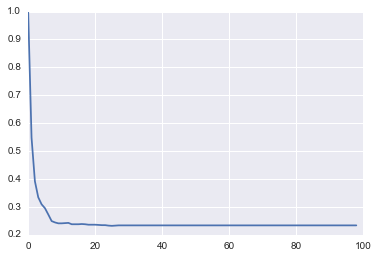

In [78]:
plt.plot(scores)

In [79]:
print scores[:10]

[0.99675324675324672, 0.54788961038961037, 0.39204545454545453, 0.33441558441558439, 0.30925324675324678, 0.29545454545454547, 0.27272727272727271, 0.24918831168831168, 0.24431818181818182, 0.24107142857142858]


Yeah, this isn't the best model either. 

### Decision Tree

non-parametric hierarchical; nodes represent questions (“test conditions”) and edges are answers to these questions (edges lead from parent node to child node starting from root node and ending in leaf nodes = class labels) → binary yes/no answers; gild (grow) a decision tree = Hunt’s algorithm (greedy recursive algorithm →goal highest possible purity: Entropy (information gain) coefficient, Gini coefficient, Misclassification Error)

#### Single Forest

In [80]:
dtc_model = DecisionTreeClassifier()

In [81]:
dtc_model.fit(X1_train,y_train)
dtc_model.score(X1_train,y_train)

1.0

Wow, totally overfitted model. 

In [82]:
cross_val_score(dtc_model, X1_train,y_train).mean()

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


0.085044883873340124

In [83]:
dtc_model.fit(X2_train,y_train)
dtc_model.score(X2_train,y_train)

0.99675324675324672

In [84]:
cross_val_score(dtc_model, X2_train,y_train).mean()

0.11489465739307163

In [85]:
dtc_model.fit(X3_train,y_train)
dtc_model.score(X3_train,y_train)

1.0

In [86]:
cross_val_score(dtc_model, X3_train,y_train).mean()

0.097923301444298505

In [87]:
dtc_model.fit(X4_train,y_train)
dtc_model.score(X4_train,y_train)

1.0

In [88]:
cross_val_score(dtc_model, X4_train,y_train).mean()

0.12073821292572358

Hm, alright; it seems like none of them are good; SMILE.

#### Random Forest

In [89]:
rfc_model=RandomForestClassifier()

In [90]:
rfc_model.fit(X1_train,y_train)
rfc_model.score(X1_train,y_train)

0.98782467532467533

In [91]:
cross_val_score(rfc_model, X1_train,y_train).mean()

0.17845678493085435

In [92]:
rfc_model.fit(X2_train,y_train)
rfc_model.score(X2_train,y_train)

0.97727272727272729

In [93]:
cross_val_score(rfc_model, X2_train,y_train).mean()

0.16160120156259725

In [94]:
rfc_model.fit(X3_train,y_train)
rfc_model.score(X3_train,y_train)

0.9910714285714286

In [95]:
cross_val_score(rfc_model, X3_train,y_train).mean()

0.18142221002943026

In [96]:
rfc_model.fit(X4_train,y_train)
rfc_model.score(X4_train,y_train)

0.99025974025974028

In [97]:
cross_val_score(rfc_model, X3_train,y_train).mean()

0.19371560093833975

These are incredibly bad ...

#### Boosting

Boosting (convert weak learners to strong learners) - classifier for classification and regressor for regression

##### Ada Boost

In [98]:
ada_boost_model = AdaBoostClassifier(n_estimators=10)
cross_val_score(ada_boost_model, X1_train,y_train).mean()

0.32790149504006821

In [99]:
cross_val_score(ada_boost_model, X2_train,y_train).mean()

0.32491651768809504

In [100]:
cross_val_score(ada_boost_model, X3_train,y_train).mean()

0.32790149504006821

In [101]:
cross_val_score(ada_boost_model, X4_train,y_train).mean()

0.32790149504006821

##### Gradient Boosting

In [102]:
gbc_model = GradientBoostingClassifier(n_estimators=10)
cross_val_score(gbc_model, X1_train,y_train).mean()

0.032675537259631272

In [103]:
cross_val_score(gbc_model, X2_train,y_train).mean()

0.03659455994336077

In [104]:
cross_val_score(gbc_model, X3_train,y_train).mean()

0.039976072487832255

In [105]:
cross_val_score(gbc_model, X4_train,y_train).mean()

0.038422872465164445

Let's try to optimize this poor model

In [106]:
%time
scores = []
for n in [1, 2, 3, 5, 10, 20, 50, 100, 200, 300]:
    for criterion in ['gini', 'entropy']:
        start_time = time.time()  # let's time it, to see how long running a forest takes
        r_model = RandomForestClassifier(n_estimators=n, criterion=criterion)
        accuracy = cross_val_score(r_model, X3_train,y_train).mean()  # out of sample accuracy
        duration = time.time() - start_time
        scores.append(dict(n_estimators=n, criterion=criterion, accuracy=accuracy, duration=duration))
scores = pd.DataFrame(scores)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


In [107]:
scores

,accuracy,criterion,duration,n_estimators
0,0.097885,gini,0.177947,1
1,0.099151,entropy,0.198464,1
2,0.089219,gini,0.245575,2
3,0.081067,entropy,0.294882,2
4,0.102644,gini,0.304281,3
5,0.116467,entropy,0.395160,3
6,0.143435,gini,0.448640,5
7,0.131209,entropy,0.583240,5
8,0.174122,gini,0.802825,10
9,0.180291,entropy,1.092281,10


In [108]:
models = [
    ('Random Forest Classifier',RandomForestClassifier(n_estimators=300))
    ,('Gradient Boosting Classifier',GradientBoostingClassifier(n_estimators=300))
    ,('Decision Tree Classifier',DecisionTreeClassifier())
    ,('Ada Boost Classfier',AdaBoostClassifier())
]
results = {}
for model, clf in models:
    score = cross_val_score(clf, X3_train,y_train).mean()
    results[model] = score

In [109]:
results

{'Ada Boost Classfier': 0.32664363340484809,
 'Decision Tree Classifier': 0.099645954329742104,
 'Gradient Boosting Classifier': 0.039545409266471362,
 'Random Forest Classifier': 0.22524051082072394}

### SVM (Support Vector Machine)

decision boundary that makes the most sense based on analytic geometry; generalization error = margin (area around line without points) → margin depends only on subset of training data nearest to line → create line with largest margin (maximum margin hyperplane) → convex objective function - take derivative and equal to zero to find max

In [110]:
from sklearn import svm
svm_model = svm.SVC()

In [111]:
svm_model.fit(X1_train,y_train)
svm_model.score(X1_train,y_train)

0.99675324675324672

In [112]:
cross_val_score(svm_model, X1_train,y_train).mean()

0.32790149504006821

## Categorical Feature - Genre

Alright, the other models failed, let's try to add genre into the mix.

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 30 columns):
Unnamed: 0              1760 non-null int64
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-n

In [114]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + log_play_count_sum', data=data, return_type='dataframe')

In [115]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.3411228619231772

While it is not great, it is better then what he have gotten so far.

In [116]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id', data=data, return_type='dataframe')

In [117]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.27140121382742377

In [118]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id + log_play_count_sum', data=data, return_type='dataframe')

In [119]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37142041316000396

Genre did not really help much, but hello close to 40% ... definitely following a trial and error approach here

In [120]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

0.36
0.381
-1.15280957644e+20
0.275
0.305
0.454
-5.24792905095e+23
-2.66153066855e+23
0.313
0.31


I should probably be concerned about the very negative numbers ... 

New motto:
"I have not failed. I've just found 10,000 ways that won't work." Thomas A. Edison

In [121]:
y, X = dmatrices('song_hotness ~ artist_familiarty + artist_hotness + genre_id + log_play_count_sum + bars_number', data=data, return_type='dataframe')

In [122]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37178314522570199

In [123]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

0.375
0.31
0.404
0.37
0.397
0.343
0.372
0.376
0.359
0.37


In [124]:
y, X = dmatrices('song_hotness ~ artist_familiarty + genre_id + artist_hotness + song_modes + song_time_signatures + log_play_count_sum', data=data, return_type='dataframe')

In [125]:
lr = LinearRegression()
lr.fit(X, y).score(X, y)

0.37215371698224342

In [126]:
for k in xrange(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
    print lr.fit(X_train, y_train).score(X_test, y_test).round(3)

-2.12416644359e+23
0.377
0.294
0.358
0.314
-4.02997571877e+21
0.284
0.341
0.359
0.266


I want to cry! There is one 40%

Other option to include genre_id

```python
from sklearn.feature_extraction import DictVectorizer
categorical_feature = data[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())
```

In [127]:
model = sm.ols(formula="song_hotness ~ artist_familiarty + genre_id + artist_hotness + song_modes + song_time_signatures + log_play_count_sum", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           song_hotness   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     42.85
Date:                Mon, 30 May 2016   Prob (F-statistic):          4.76e-156
Time:                        14:57:31   Log-Likelihood:                 1343.9
No. Observations:                1760   AIC:                            -2638.
Df Residuals:                    1735   BIC:                            -2501.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.2397      0.115      2.092      0.037         0.015     0.464
genre_id[T.Blues]             -0.0322      0.115     -0.280      0.780        -0.258     0.194
genre_id[T.Children]          -0.0722      0.123     -0.587      0.557        -0.313     0.169
genre_id[T.Classical]         -0.1045      0.139     -0.751      0.453        -0.378     0.168
genre_id[T.Comedy_Spoken]     -0.0365      0.117     -0.312      0.755        -0.266     0.193
genre_id[T.Country]           -0.0502      0.115     -0.438      0.662        -0.275     0.175
genre_id[T.Easy_Listening]    -0.1135      0.131     -0.864      0.387        -0.371     0.144
genre_id[T.Electronic]         0.0015      0.114      0.013      0.990        -0.223     0.226
genre_id[T.Folk]              -0.0152      0.118     -0.129      0.898        -0.246     0.216
genre_id[T.International]     -0.0217      0.115     -0.189      0.851        -0.247     0.204
genre_id[T.Jazz]              -0.0100      0.115     -0.087      0.931        -0.235     0.215
genre_id[T.Latin]             -0.0592      0.114     -0.517      0.605        -0.283     0.165
genre_id[T.New Age]           -0.0754      0.116     -0.649      0.517        -0.303     0.153
genre_id[T.Pop_Rock]           0.0043      0.114      0.038      0.970        -0.219     0.228
genre_id[T.Rap]               -0.0324      0.114     -0.283      0.777        -0.257     0.192
genre_id[T.Reggae]            -0.0557      0.115     -0.484      0.629        -0.281     0.170
genre_id[T.Religious]         -0.0648      0.115     -0.566      0.571        -0.289     0.160
genre_id[T.RnB]               -0.0224      0.115     -0.194      0.846        -0.248     0.203
genre_id[T.Stage ]            -0.0655      0.120     -0.546      0.585        -0.301     0.170
genre_id[T.Vocal]             -0.0307      0.123     -0.249      0.803        -0.272     0.211
artist_familiarty              0.2174      0.037      5.915      0.000         0.145     0.289
artist_hotness                 0.0756      0.041      1.836      0.067        -0.005     0.156
song_modes                     0.0069      0.006      1.169      0.243        -0.005     0.018
song_time_signatures           0.0020      0.002      0.852      0.394        -0.003     0.007
log_play_count_sum             0.0248      0.001     16.583      0.000         0.022     0.028
==============================================================================
Omnibus:                       30.154   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.259
Skew:                          -0.321   Prob(JB):                     1.63e-07
Kurtosis:                       3.117   Cond. No.                     1.09e+03
============================

I did some research to see, what the average R-squared is for predicting music taste. I found that mood is a very good predictor; would have needed the k-means on the lyrics for that - damn you expired Echonest API!

https://books.google.com/books?id=_zc3vKDLUNIC&pg=PA157&lpg=PA157&dq=R-squared+for+predicting+music&source=bl&ots=dUoTzH54JJ&sig=N01LAbXRoaAP4Bwp9_Kyr-UE6rA&hl=en&sa=X&ved=0ahUKEwj99N6E8YDNAhWCox4KHdmxBIwQ6AEIPjAE#v=onepage&q=R-squared%20for%20predicting%20music&f=false

Let's use some seaborn, just because we can. Generally, when you are lost, use some seaborn ... 

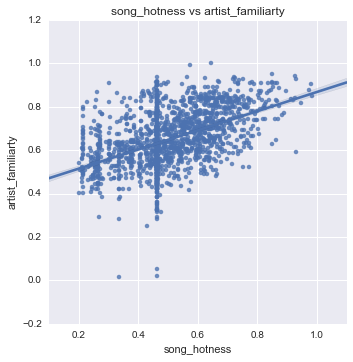

In [128]:
f = sb.lmplot(x = 'song_hotness', y='artist_familiarty', data=data, ci=95)
f = plt.title("song_hotness vs artist_familiarty")

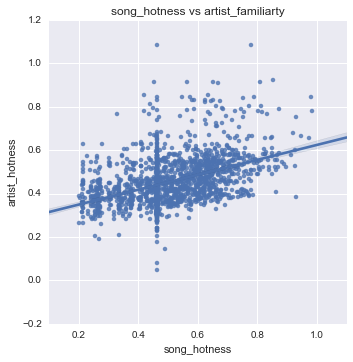

In [129]:
f = sb.lmplot(x = 'song_hotness', y='artist_hotness', data=data, ci=95)
f = plt.title("song_hotness vs artist_familiarty")

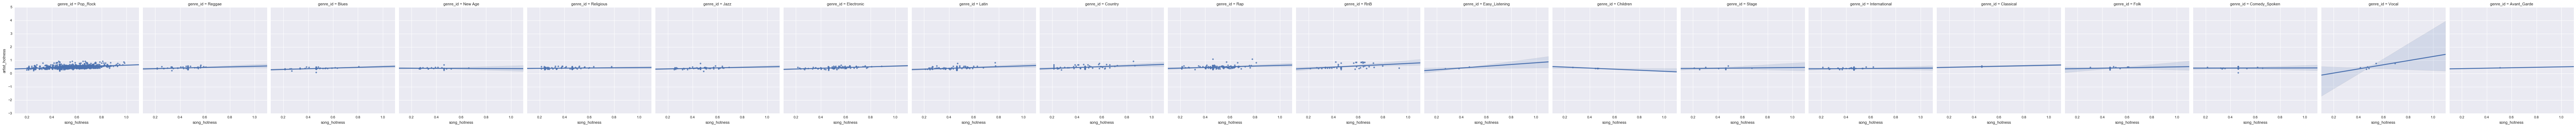

In [130]:
f = sb.lmplot(x = 'song_hotness', y='artist_hotness', col='genre_id', data=data)

might be my favorite graph! (*wink)

### Regularization

The moment has come ... reguralization

In [131]:
degree = 4
modelchen = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression()).fit(X, y)

In [132]:
modelchen.score(X, y)

0.59188447765175156

"modelchen" is a sweeter version of model in German

In [ ]:
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For degree", degree, ", R2 =", np.mean(scores)

"You'll need regularization when your model is complex, which happens when you have little data or many features."
- little data: CHECK
- many features: CHECK  
conclusion: complex model, we need regularization  
At least no worrying about overfitting. 

In [ ]:
degree =5
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6]:
    for no, my_model in enumerate([LinearRegression(), Ridge(alpha=alpha), Lasso(alpha=alpha)]):
        model = make_pipeline(PolynomialFeatures(degree), my_model)    
        r2, MSE = [], []
        for k in xrange(100):  # Fit a few times the model to different training sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
            r2.append(model.fit(X_train, y_train).score(X_test, y_test))
            MSE.append(np.square(y_pred_sample - y_small_sample).sum())

##### Lasso

Lasso regression imposes an L1 prior on the coefficient, causing many coeffiecients to be zero.

In [ ]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6]:
    model = Lasso(alpha=alpha)
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For alpha", alpha, ", R2 =", np.mean(scores)

In [ ]:
lasso = Lasso (alpha = 6)

In [ ]:
print -cross_val_score(lasso, X, y, cv=10, scoring="mean_absolute_error").mean()
print -np.median(cross_val_score(lasso, X, y, cv=10, scoring="median_absolute_error"))

##### RIdge

Ridge regression imposes an L2 prior on the coefficient, causing outliers to be less likely, and coeffiecients to be small across the board.

In [ ]:
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1,4,5,6,7,8,9,10]:
    model = Ridge(alpha=alpha)
    scores = []
    for _ in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For alpha", alpha, ", R2 =", np.mean(scores)

In [ ]:
ridge = Ridge (alpha= 0.5)

In [ ]:
print -cross_val_score(ridge, X, y, cv=10, scoring="mean_absolute_error").mean()
print -np.median(cross_val_score(ridge, X, y, cv=10, scoring="median_absolute_error"))

## k-means clustering

Maybe we use the k-means clustering unsupervised machine learning model to create additional features?

In [ ]:
from sklearn.feature_extraction import DictVectorizer

categorical_features = data[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())

In [ ]:
categorical_features.head()

In [ ]:
data.info()

In [ ]:
from scipy.sparse import hstack
other_features = data[['artist_familiarty','artist_hotness','song_modes','song_time_signatures','log_play_count_sum',\
                       'song_durations','song_tempo','beats_number','song_release_years']]

In [ ]:
other_features.head()

In [ ]:
data_matrix = hstack([cat_matrix, other_features])
data_matrix

In [ ]:
from sklearn.preprocessing import scale

data_matrix = scale(data_matrix.todense())

In [ ]:
from sklearn.cluster import KMeans

clustering_model = KMeans(n_clusters = 25)
clustering_model.fit(data_matrix)

clusters = clustering_model.predict(data_matrix)

clusters

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
data['genre_id'].value_counts()

In [ ]:
results = pd.DataFrame({ 'cluster' : clusters, 'genre_id' : data['genre_id']})
cluster_counts = results.groupby('cluster')['genre_id'].value_counts()

In [ ]:
results

In [ ]:
cluster_counts

In [ ]:
for i in xrange(len(cluster_counts)):
    print "Cluster " ,i
    print cluster_counts[i]
    print

Let's accept, we should just use the unsupervised learning models.